<h6>Before starting <span class="label label-danger">IMPORTANT</span></h6>
Throughout this project, I will be introducing some **reproducible functions** that can be used in any machine learning project to automate the process:
* Data visualization: Functions `msv1`and `msv2`to visualize missing values.
* Machine learning: Function `r_reg` does regression with regularization (Ridge, Lasso).

For more information, check out my [regression github repository](https://github.com/Amiiney/regression).
***
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">개요 및 목차</h3>
     
> ### 1. EXPLORATORY DATA ANALYSIS

> ### 2. DATA CLEANING

> ### 3. FEATURE ENGINEERING

> ### 4. ENCODING CATEGORICAL FEATURES

> ### 5. DETECTING OUTLIERS

> ### 6. MACHINE LEARNING

## 예제 소개:
***
본 예제는 2006년부터 2010년까지의 미국 아이오와 주의 에임스에 있는 주거용 주택 정보를 이용하여 주택 판매가격을 예측합니다.

데이터 전처리부터 feature engineering, 알고리즘 탐색 및 선택까지 다루며 모델평가는 RMSE 지표를 사용합니다.

## About Data:
***
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

# 1- Preparation Step
***
표준 라이브러리를 가져옵니다

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

## Google Colab 환경에서 한글 폰트 사용 설정

In [3]:
### 한글 폰트 깨짐 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

### 후에 런타임 다시 시작 하고 밑에 임포트

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and di

In [ ]:
import matplotlib.pyplot as plt
!pip install seaborn==0.11
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(15,8.15)})

plt.rc('font', family='NanumBarunGothic') 

# # seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# # "Malgun Gothic"
# sns.set(font="AppleGothic", 
#         rc={"axes.unicode_minus":False},
#         style='darkgrid')

# # 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

편의를 위해 각각의 데이터셋을 알파벳으로 다음과 같이 명칭합니다.
        
         a=train
         b=test
         c= combined dataset (train+test)

데이터를 불러옵니다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
a = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/house_price/train.csv')
b = pd.read_csv('/content/drive/My Drive/Colab Notebooks/kaggle/house_price/test.csv')

In [5]:
#모든 칼럼을 명시하기 위한 설정값
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
a.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
print('training set 데이터 모양: %s houses and %s features'%(a.shape[0],a.shape[1]))
print('test set 데이터 모양: %s houses and %s features'%(b.shape[0],b.shape[1]))

training set 데이터 모양: 1460 houses and 81 features
test set 데이터 모양: 1459 houses and 80 features


* 테스트셋은 훈련셋에 비해 1개의 피쳐/칼럼이 부족한데, 이 칼럼이 바로 우리가 예측해야할 타겟인 SalePrice입니다
* 80여개의 칼럼이 존재하며, 우리가 예측해야할 타겟 칼럼인 주택가격 정보는 **"SalePrice"** 칼럼입니다

# 1- 데이터 탐색
***


우리는 80여 개의 칼럼을 활용해 좀더 많은 정보와 인사이트를 얻으려 합니다. 

따라서 타겟 칼럼인 **주택가격** 과 나머지 칼럼간의 전반적인 관계를 파악하기 위해 시각화를 활용해보겠습니다. 

아래 히트맵 그래프를 통해 진한 색상의 상수 칼럼들이 타겟 칼럼과 높은 상관관계를 가지고 있는 것을 알 수 있습니다.

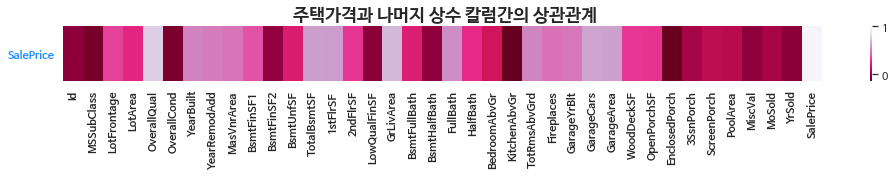

In [8]:
num=a.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" 주택가격과 나머지 상수 칼럼간의 상관관계", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

주택가격과 상관관계가 큰 순으로 10개 칼럼들을 나열해보겠습니다

In [ ]:
# 얘도 함수화..?
def corr_simple_table(target_column, num):
  Num=numcorr[target_column].sort_values(ascending=False).head(num).to_frame()
  cm = sns.light_palette("cyan", as_cmap=True)
  s = Num.style.background_gradient(cmap=cm)
  return s
corr_simple_table('SalePrice',10)

In [10]:
Num=numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


* **전반적인 퀄리티(overall quality)**, **거실(living area), 차고(garage cars), 창고(garage area)**, **지하(basement area)** 가 **주택가격**과 가장 큰 상관관계를 보이고 있네요.

* 이 외에도 **욕조(full bath)**, **1층 면적(1st floor surface)**도 상당히 상관도가 있는 걸로 보입니다. 전반적으로 퀄리티가 좋고, 면적이 클수록, 럭셔리할수록 주택가격이 높아진다고 이해할 수 있겠습니다.
* 마지막으로 **건축연도(Year built)**를 통해 신축일수록 주택가격이 올라가는 경향을 알 수 있습니다.


> **상관도가 큰 2개의 대표적인 상수 칼럼인 주택가격과 지상 면적을 좀더 살펴보겠습니다**

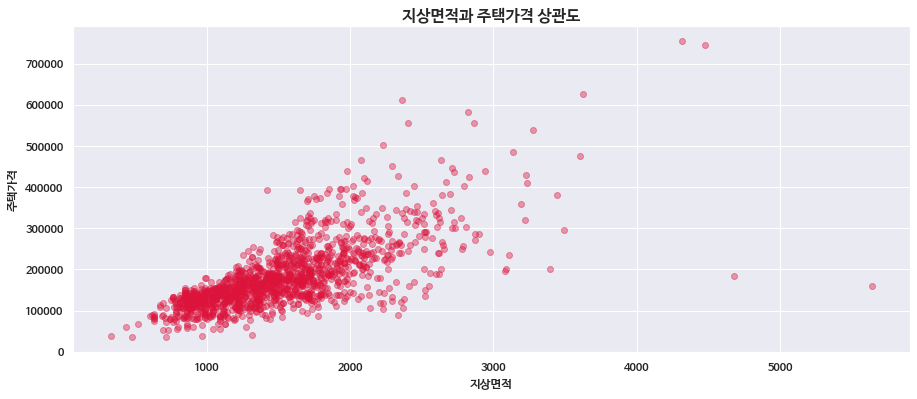

In [11]:
plt.figure(figsize=(15,6))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color='crimson', alpha=0.4)
plt.title('지상면적과 주택가격 상관도', weight='bold', fontsize=16)
plt.xlabel('지상면적', weight='bold', fontsize=12)
plt.ylabel('주택가격', weight='bold', fontsize=12)
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.show()

지금까지는 상수 칼럼들을 살펴보았는데, 범주형 데이터 또한 우리에게 많은 정보를 줄 겁니다.
예를 들어, 주택가격을 결정하는 데 있어 입지는 어쩌면 가장 중요한 요소라고 할 수도 있습니다.

> **도심 내 주요 행정구역(Neighborhood)** 을 예로 살펴보겠습니다.

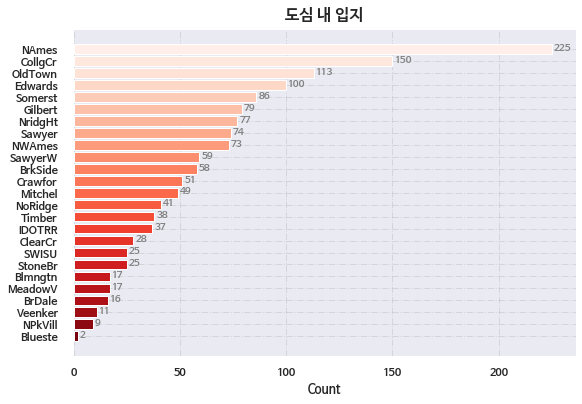

In [12]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.Neighborhood.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Reds',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('도심 내 입지',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

plt.show()
# Show Plot
plt.show()

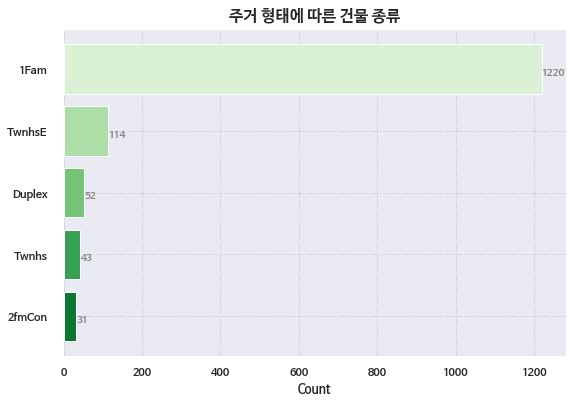

In [13]:
# Figure Size
fig, ax = plt.subplots(figsize=(9,6))

# Horizontal Bar Plot
title_cnt=a.BldgType.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color=sns.color_palette('Greens',len(title_cnt)))

# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('주거 형태에 따른 건물 종류',weight='bold',
             loc='center', pad=10, fontsize=16)
ax.set_xlabel('Count', weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')


plt.show()

* But before going any futher, we start by cleaning the data from missing values. I set the threshold to 80% (red line), all columns with more than 80% missing values will be dropped.

EDA를 통해 데이터를 살펴보았습니다. 다음 단계에서 다룰 데이터 전처리 및 정제 과정을 위해 훈련 셋과 테스트 셋을 합친 뒤, 타겟 칼럼인 주택 가격을 드롭 합니다.

In [14]:
na = a.shape[0]
nb = b.shape[0]
y_train = a['SalePrice'].to_frame()
#Combine train and test sets
c1 = pd.concat((a, b), sort=False).reset_index(drop=True)
#Drop the target "SalePrice" and Id columns
c1.drop(['SalePrice'], axis=1, inplace=True)
c1.drop(['Id'], axis=1, inplace=True)
print(f"타겟 칼럼인 주택가격을 드롭한 후 데이터의 토탈 사이즈는 {c1.shape} 입니다")

타겟 칼럼인 주택가격을 드롭한 후 데이터의 토탈 사이즈는 (2919, 79) 입니다


# 2- 데이터 클리닝
***
   > ### 2.1 80%이상의 결측치: ***(In this version >20%)***

수영장을 평가하는 칼럼(PoolQC)의 경우 결측치가 대부분인데, 아마도 건물 대다수에 수영장이 없어서 그런 거라고 추측할 수 있습니다. 결측치를 "수영장 없음" 같은 값으로 대체하게 된다면 이 변수는 굉장히 낮은 variance 를 가질 것이고, 낮은 variance의 피쳐는 머신 러닝 모델에 도움이 되는 정보를 주기 힘듭니다. 따라서, 우리는 80% 이상의 결측치를 갖는 피처들을 드롭합니다*(아래 시각화 참고)*.

* ***PS: In this version, I lower the threshold to 20% to drop more columns***

In [15]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    
    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('변수별 결측치 비율', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'{thresh}% 이상 결측치를 갖고 있는 칼럼', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'{thresh}% 미만 결측치를 갖고 있는 칼럼', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('변수명', size=15, weight='bold')
    plt.ylabel('결측치 비율')
    plt.yticks(weight ='bold')
    
    return plt.show()

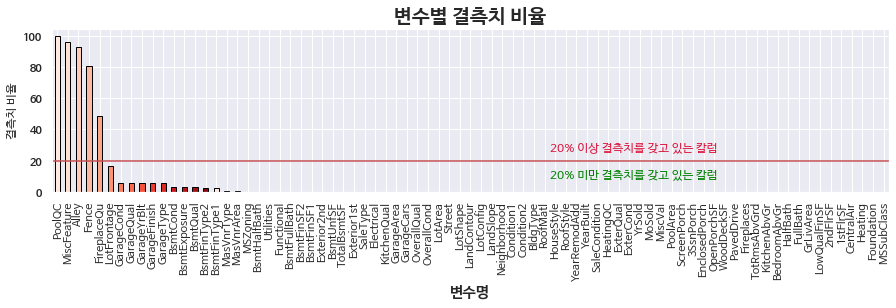

In [16]:
msv1(c1, 20, color=sns.color_palette('Reds',15))

* 다행히 대다수 피쳐들은 결측치가 없네요! 상한선을 넘은 5개 변수는 드롭합니다

* We combine first the train and test datasets to run all the data munging and feature engineering on both of them.

In [17]:
c=c1.dropna(thresh=len(c1)*0.8, axis=1)
print(f"훈련 셋과 테스트 셋이 합쳐진 전체 데이터 셋에서 {c1.shape[1]-c.shape[1]} 개의 피쳐들을 드롭합니다.")

훈련 셋과 테스트 셋이 합쳐진 전체 데이터 셋에서 5 개의 피쳐들을 드롭합니다.


결측치를 모두 같은 방식으로 처리할 수는 없기 때문에 피쳐들을 좀더 자세히 살펴보도록 하겠습니다. 
 Some features have barely 1 or 2 missing values, we will use the forward fill method to fill them.

In [21]:
allna = (c.isnull().sum() / len(c))*100
allna = allna.drop(allna[allna == 0].index).sort_values()

def msv2(data, width=12, height=8, color=('silver', 'gold','lightgreen','skyblue','lightpink'), edgecolor='black'):
    """
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    """
    fig, ax = plt.subplots(figsize=(width, height))

    allna = (data.isnull().sum() / len(data))*100
    tightout= 0.008*max(allna)
    allna = allna.drop(allna[allna == 0].index).sort_values().reset_index()
    mn= ax.barh(allna.iloc[:,0], allna.iloc[:,1], color=color, edgecolor=edgecolor)
    ax.set_title('변수별 결측치 비율', fontsize=15, weight='bold' )
    ax.set_xlabel('%', weight='bold', size=15)
    ax.set_ylabel('변수명', weight='bold')
    plt.yticks(weight='bold')
    plt.xticks(weight='bold')
    for i in ax.patches:
        ax.text(i.get_width()+ tightout, i.get_y()+0.1, str(round((i.get_width()), 2))+'%',
            fontsize=10, fontweight='bold', color='grey')
    return plt.show()

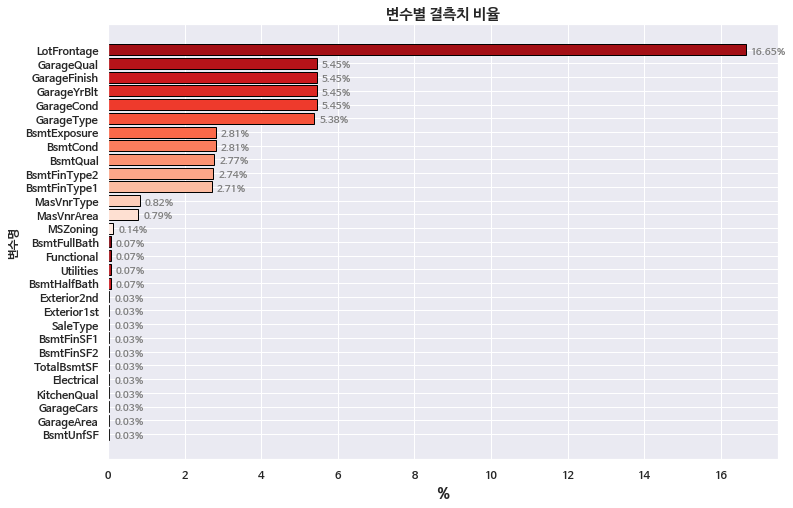

In [22]:
msv2(c,color=sns.color_palette('Reds',15))

In [23]:
print(f'80% 이상 결측치 보유한 변수 5개를 드롭한, 훈련 셋과 테스트 셋 합친 전체 데이터 셋의 크기는 {c.shape}입니다.')

80% 이상 결측치 보유한 변수 5개를 드롭한, 훈련 셋과 테스트 셋 합친 전체 데이터 셋의 크기는 (2919, 74)입니다.


데이터 타입이 다르고, 피쳐가 다양하기 때문에 결측치를 따로 분리하겠습니다.

In [25]:
NA=c[allna.index.to_list()]

아래와 같이 두 가지 타입으로 나눕니다:
* categorical feature(범주형)
* numerical feature(수치/상수)

In [26]:
NAcat=NA.select_dtypes(include='object')
NAnum=NA.select_dtypes(exclude='object')
print(f'{NAcat.shape[1]} 개의 범주형 피쳐에 결측치가 있습니다.')
print(f'{NAnum.shape[1]} 개의 상수형 피쳐에 결측치가 있습니다.')

18 개의 범주형 피쳐에 결측치가 있습니다.
11 개의 상수형 피쳐에 결측치가 있습니다.


따라서, 18개의 범주형 피쳐와 11개의 상수형 피쳐는 데이터 클리닝 과정을 거쳐야 해야 합니다.
* Numerical features 처리를 위해서는 먼저 변수들의 **분포**를 이해하고 어떻게 처리할지 결정해야 합니다.
- 대다수 결측치들은 해당 변수에 대한 값이 없어서 결측치로 남아있을 것이기 때문에 0 으로 대체될 것입니다. 한 예로, 차고(GarageCars)나 창고(GarageArea) 칼럼의 결측치는 해당 주택에 차고와 창고가 없기 때문일 겁니다.
- 창고를 세운 연도를 나타내는 GarageYrBlt 칼럼의 경우 0으로 대체할 수 없기 때문에 중앙값(median)인 1980으로 대체합니다. 

> ### 2.2 Numerical Feature:

In [ ]:
NAnum.head()

,BsmtUnfSF,GarageArea,GarageCars,TotalBsmtSF,BsmtFinSF2,BsmtFinSF1,BsmtHalfBath,BsmtFullBath,MasVnrArea,GarageYrBlt,LotFrontage
0,150.0,548.0,2.0,856.0,0.0,706.0,0.0,1.0,196.0,2003.0,65.0
1,284.0,460.0,2.0,1262.0,0.0,978.0,1.0,0.0,0.0,1976.0,80.0
2,434.0,608.0,2.0,920.0,0.0,486.0,0.0,1.0,162.0,2001.0,68.0
3,540.0,642.0,3.0,756.0,0.0,216.0,0.0,1.0,0.0,1998.0,60.0
4,490.0,836.0,3.0,1145.0,0.0,655.0,0.0,1.0,350.0,2000.0,84.0


In [ ]:
#MasVnrArea: Masonry veneer area in square feet, the missing data means no veneer so we fill with 0
c['MasVnrArea']=c.MasVnrArea.fillna(0)
#LotFrontage has 16% missing values. We fill with the median
c['LotFrontage']=c.LotFrontage.fillna(c.LotFrontage.median())
#GarageYrBlt:  Year garage was built, we fill the gaps with the median: 1980
c['GarageYrBlt']=c["GarageYrBlt"].fillna(1980)

> ### 2.3 Categorical features:

And we have 18 Categorical features with missing values:
* Some features have just 1 or 2 missing values, so we will just use the forward fill method because they are obviously values that can't be filled with 'None's
* Features with many missing values are mostly basement and garage related (same as in numerical features) so as we did with numerical features (filling them with 0s), we will fill the categorical missing values with "None"s assuming that the houses lack basements and garages.

In [ ]:
NAcat.head()

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,No,Attchd,TA,RFn,TA
1,TA,SBrkr,WD,MetalSd,MetalSd,AllPub,Typ,RL,None,ALQ,Unf,Gd,TA,Gd,Attchd,TA,RFn,TA
2,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Mn,Attchd,TA,RFn,TA
3,Gd,SBrkr,WD,Wd Sdng,Wd Shng,AllPub,Typ,RL,None,ALQ,Unf,TA,Gd,No,Detchd,TA,Unf,TA
4,Gd,SBrkr,WD,VinylSd,VinylSd,AllPub,Typ,RL,BrkFace,GLQ,Unf,Gd,TA,Av,Attchd,TA,RFn,TA


>> Number of missing values per column:

In [ ]:
NAcat1= NAcat.isnull().sum().to_frame().sort_values(by=[0]).T
cm = sns.light_palette("lime", as_cmap=True)

NAcat1 = NAcat1.style.background_gradient(cmap=cm)
NAcat1

,KitchenQual,Electrical,SaleType,Exterior1st,Exterior2nd,Utilities,Functional,MSZoning,MasVnrType,BsmtFinType1,BsmtFinType2,BsmtQual,BsmtCond,BsmtExposure,GarageType,GarageCond,GarageFinish,GarageQual
0,1,1,1,1,1,2,2,4,24,79,80,81,82,82,157,159,159,159


The table above helps us to locate the categorical features with few missing values.
* We start our cleaning with the features having just few missing value (1 to 4):  We fill the gap with forward fill method:



In [ ]:
ffill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']

def filling_NA(data, columns, METHOD='ffill'):
    fill_cols = columns
    
    for col in data[fill_cols]:
        data[col]= data[col].fillna(method=METHOD)
    
    return data

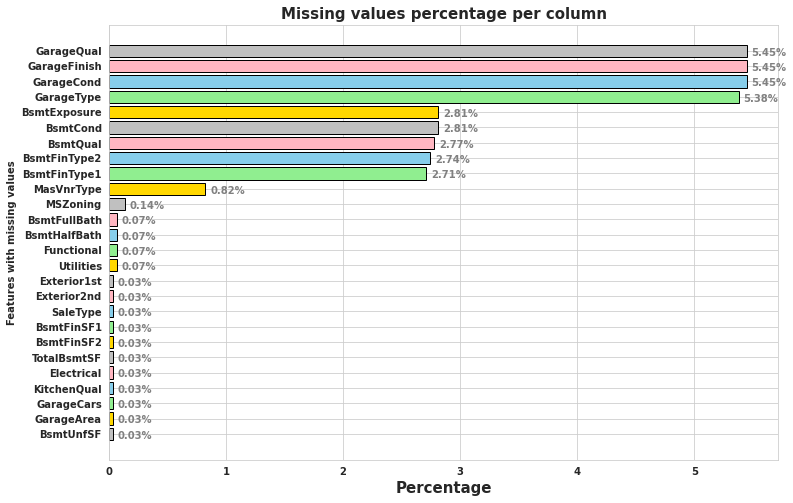

In [ ]:
msv2(c)

In [ ]:
d=filling_NA(c, ffill_cols)

In [ ]:
fill_cols = ['Electrical', 'SaleType', 'KitchenQual', 'Exterior1st',
             'Exterior2nd', 'Functional', 'Utilities', 'MSZoning']

for col in c[fill_cols]:
    c[col] = c[col].fillna(method='ffill')

* We dealt already with small missing values or values that can't be filled with "0" such as Garage year built.
* The rest of the features are mostly basement and garage related with 100s of missing values, we will just fill 0s in the numerical features and 'None' in categorical features, assuming that the houses don't have basements, full bathrooms or garage.

In [ ]:
#Categorical missing values
NAcols=c.columns
for col in NAcols:
    if c[col].dtype == "object":
        c[col] = c[col].fillna("None")

In [ ]:
#Numerical missing values
for col in NAcols:
    if c[col].dtype != "object":
        c[col]= c[col].fillna(0)

In [ ]:
c.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
YearRemodAdd     0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
dtype: int64

We finally end up with a clean dataset, next thing to do: **Create new features.**

# 3- Feature engineering:
***
Since the area is a very important variable, we will create a new feature "**TotalArea**" that sums the area of all the floors and the basement.
* **Bathrooms**: All the bathroom in the ground floor
* **Year average**: The average of the sum of the year the house was built and the year the house was remodeled



In [ ]:
c['TotalArea'] = c['TotalBsmtSF'] + c['1stFlrSF'] + c['2ndFlrSF'] + c['GrLivArea'] +c['GarageArea']

c['Bathrooms'] = c['FullBath'] + c['HalfBath']*0.5 

c['Year average']= (c['YearRemodAdd']+c['YearBuilt'])/2

Feature engineering is very important to improve the model's performance, I will start in this kernel just with the TotalArea, Bathrooms and average year features and will keep updating the kernel by creating new features.
* ** This part of the kernel is not finished yet.**

# 4- Encoding categorical features:
***
> ### 4.1 Numerical features:

We start with numerical features that are actually categorical, for example "Month sold", the values are from 1 to 12, each number is assigned to a month November is number 11 while March is number 3. 11 is just the order of the months and not a given value, so we convert the "Month Sold" feature to categorical

In [ ]:
c['MoSold'] = c['MoSold'].astype(str)
c['MSSubClass'] = c['MSSubClass'].apply(str)
c['YrSold'] = c['YrSold'].astype(str)

> ### 4.2 One hot encoding:

In [ ]:
cb=pd.get_dummies(c)
print(f"the shape of the original dataset {c.shape}")
print(f"the shape of the encoded dataset {cb.shape}")
print(f"We have {cb.shape[1]- c.shape[1]} new encoded features")

the shape of the original dataset (2919, 77)
the shape of the encoded dataset (2919, 312)
We have 235 new encoded features


We are done with the cleaning and feature engineering. Now, we split the combined dataset to the original train and test sets

In [ ]:
Train = cb[:na]  #na is the number of rows of the original training set
Test = cb[na:] 

# 5- Outliers detection:
***
> ### 5.1 Outliers visualization:

This part of the kernel will be a little bit messy. I didn't want to deal with the outliers in the combined dataset to keep the shape of the original train and test datasets. Dropping them would shift the location of the rows.
* If you know a better solution to this, I will be more than happy to read your recommandations.

* OK. So we go back to our original train dataset to visualize the important features / Sale price scatter plot to find outliers

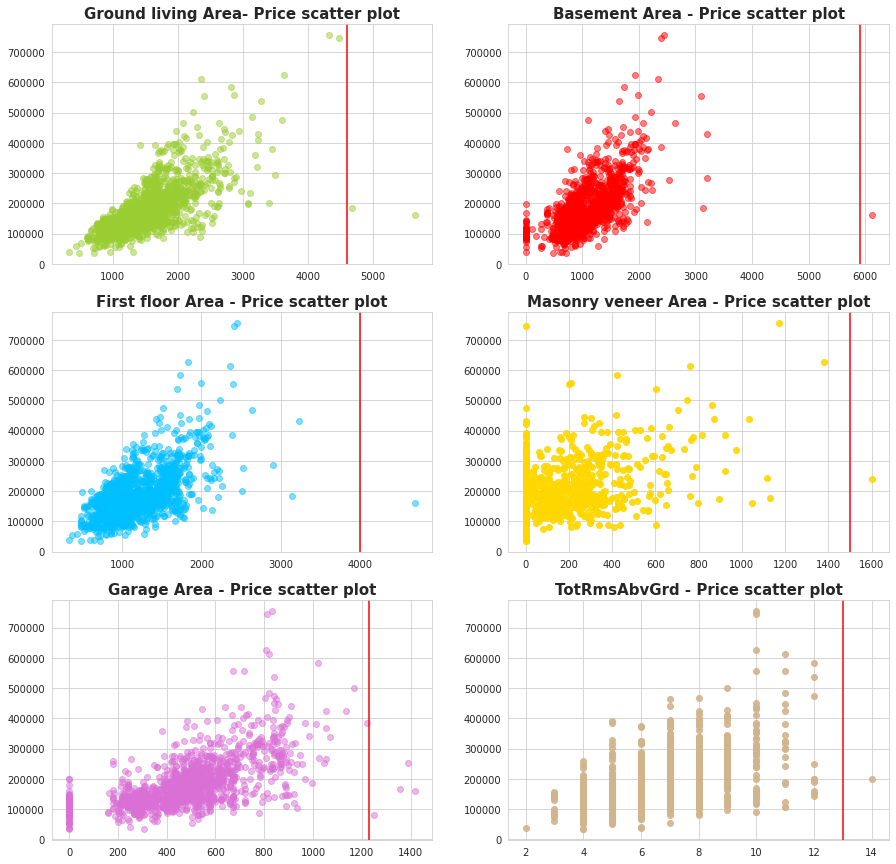

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=a['TotalBsmtSF'], y=a['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=a['1stFlrSF'], y=a['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=a['MasVnrArea'], y=a['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=a['GarageArea'], y=a['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=a['TotRmsAbvGrd'], y=a['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

The outliers are the points in the right that have a larger area or value but a very low sale price. We localize those points by sorting their respective columns

* Interesting! The outlier in "basement" and "first floor" features is the same as the first outlier in ground living area: **The outlier with index number 1298. **

> ### 5.2 Outliers localization:

We sort the columns containing the outliers shown in the graph, we will use the function *head()* to show the outliers: ***head(number of outliers or dots shown in each plot)***

In [ ]:
a['GrLivArea'].sort_values(ascending=False).head(2)

1298    5642
523     4676
Name: GrLivArea, dtype: int64

In [ ]:
a['TotalBsmtSF'].sort_values(ascending=False).head(1)

1298    6110
Name: TotalBsmtSF, dtype: int64

In [ ]:
a['MasVnrArea'].sort_values(ascending=False).head(1)

297    1600.0
Name: MasVnrArea, dtype: float64

In [ ]:
a['1stFlrSF'].sort_values(ascending=False).head(1)

1298    4692
Name: 1stFlrSF, dtype: int64

In [ ]:
a['GarageArea'].sort_values(ascending=False).head(4)

1298    1418
581     1390
1190    1356
1061    1248
Name: GarageArea, dtype: int64

In [ ]:
a['TotRmsAbvGrd'].sort_values(ascending=False).head(1)

635    14
Name: TotRmsAbvGrd, dtype: int64


We can safely remove those points.

In [ ]:
#train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500) & (Train['GarageArea'] < 1240)
#           & (Train['TotRmsAbvGrd'] < 13)]

#print('We removed ',Train.shape[0]- train.shape[0],'outliers')

In [ ]:
train=Train[(Train['GrLivArea'] < 4600) & (Train['MasVnrArea'] < 1500)]

print(f'We removed {Train.shape[0]- train.shape[0]} outliers')

We removed 3 outliers


We do the same thing with "SalePrice" column, we localize those outliers and make sure they are the right outliers to remove. 
* They both have the same price range as the detected outliers. So, we can safely drop them.

In [ ]:
target=a[['SalePrice']]
target.loc[1298]

SalePrice    160000
Name: 1298, dtype: int64

In [ ]:
target.loc[523]

SalePrice    184750
Name: 523, dtype: int64

We gather all the outliers index positions and drop them from the target dataset

In [ ]:
#train=Train.copy()
#pos=[30,   88,  142,  277,  308,  328,  365,  410,  438,  462,  495,
#        523,  533,  581,  588,  628,  632,  681,  688,  710,  714,  728,
#        774,  812,  874,  898,  916,  935,  968,  970, 1062, 1168, 1170,
#        1181, 1182, 1298, 1324, 1383, 1423, 1432, 14]
#target.drop(target.index[pos], inplace=True)
#train.drop(target.index[pos], inplace=True)

In [ ]:
#pos = [1298,523, 297, 581, 1190, 1061, 635, 197,1328, 495, 583, 313, 335, 249, 706]
pos = [1298,523, 297]
target.drop(target.index[pos], inplace=True)

*P.S. I didn't drop all the outliers because dropping all of them led to a worst RMSE score. More investigation is needed to filter those outliers.*

In [ ]:
print('We make sure that both train and target sets have the same row number after removing the outliers:')
print( 'Train: ',train.shape[0], 'rows')
print('Target:', target.shape[0],'rows')

We make sure that both train and target sets have the same row number after removing the outliers:
Train:  1457 rows
Target: 1457 rows


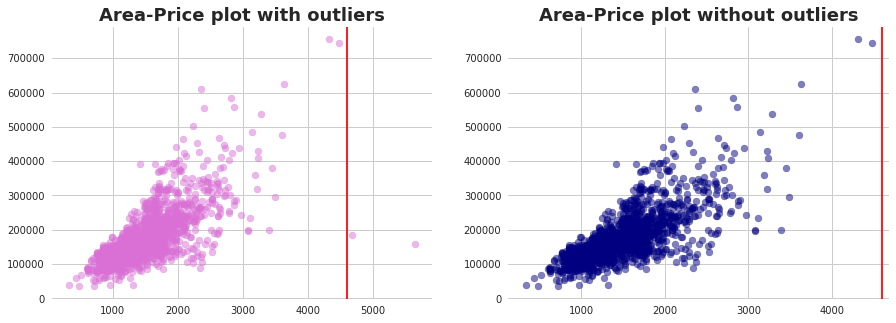

In [ ]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=a['GrLivArea'], y=a['SalePrice'], color=('orchid'), alpha=0.5)
plt.title('Area-Price plot with outliers',weight='bold', fontsize=18)
plt.axvline(x=4600, color='r', linestyle='-')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.scatter(x=train['GrLivArea'], y=target['SalePrice'], color='navy', alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Area-Price plot without outliers',weight='bold', fontsize=18)
plt.show()

> ## Log transform skewed numeric features:

We want our skewness value to be around 0 and kurtosis less than 3. For more information about skewness and kurtosis,I recommend reading [this article.](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)

Here are two examples of skewed features: Ground living area and 1st floor SF. We will apply **np.log1p** to the skewed variables.

In [ ]:
print("Skewness before log transform: ", a['GrLivArea'].skew())
print("Kurtosis before log transform: ", a['GrLivArea'].kurt())

Skewness before log transform:  1.3665603560164552
Kurtosis before log transform:  4.895120580693174


In [ ]:
from scipy.stats import skew

#numeric_feats = c.dtypes[c.dtypes != "object"].index

#skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
#skewed_feats = skewed_feats[skewed_feats > 0.75]
#skewed_feats = skewed_feats.index

#train[skewed_feats] = np.log1p(train[skewed_feats])



In [ ]:
print(f"Skewness after log transform: {train['GrLivArea'].skew()}")
print(f"Kurtosis after log transform: {train['GrLivArea'].kurt()}")

Skewness after log transform: 1.0127645385480262
Kurtosis after log transform: 2.0672339304153655


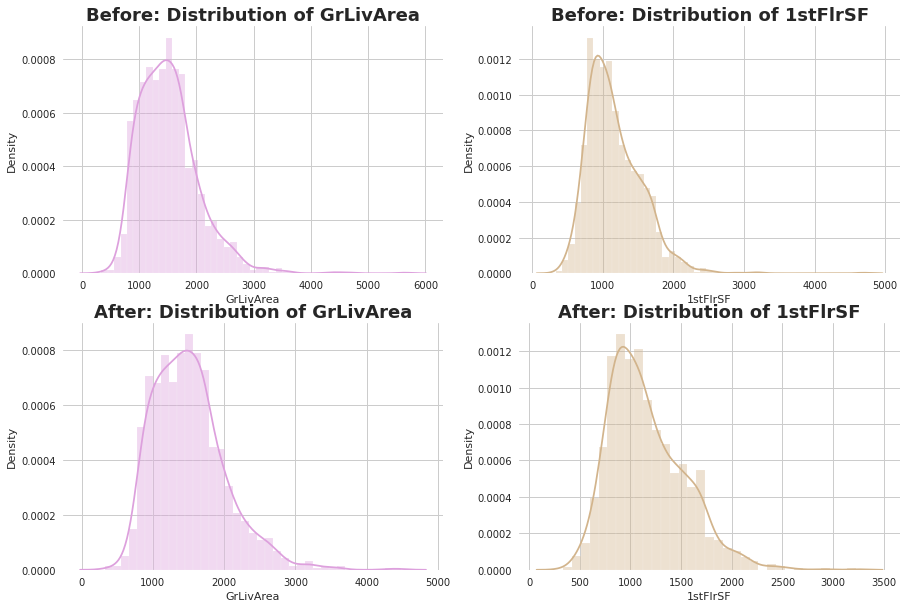

In [ ]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,10))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((2,2),(0,0))
sns.distplot(a.GrLivArea, color='plum')
plt.title('Before: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(0,1))
sns.distplot(a['1stFlrSF'], color='tan')
plt.title('Before: Distribution of 1stFlrSF',weight='bold', fontsize=18)


ax1 = plt.subplot2grid((2,2),(1,0))
sns.distplot(train.GrLivArea, color='plum')
plt.title('After: Distribution of GrLivArea',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((2,2),(1,1))
sns.distplot(train['1stFlrSF'], color='tan')
plt.title('After: Distribution of 1stFlrSF',weight='bold', fontsize=18)
plt.show()

Last thing to do before Machine Learning is to log transform the target as well, as we did with the skewed features.

*P.S. Log transoform is only applied on the target in this version, not on the features. I will be applying the log transoform on the features in future versions of this kernel*

In [ ]:
print(f"Skewness before log transform: {target['SalePrice'].skew()}")
print(f"Kurtosis before log transform: {target['SalePrice'].kurt()}")

Skewness before log transform: 1.8829247000823222
Kurtosis before log transform: 6.527120338179705


In [ ]:
#log transform the target:
target["SalePrice"] = np.log1p(target["SalePrice"])

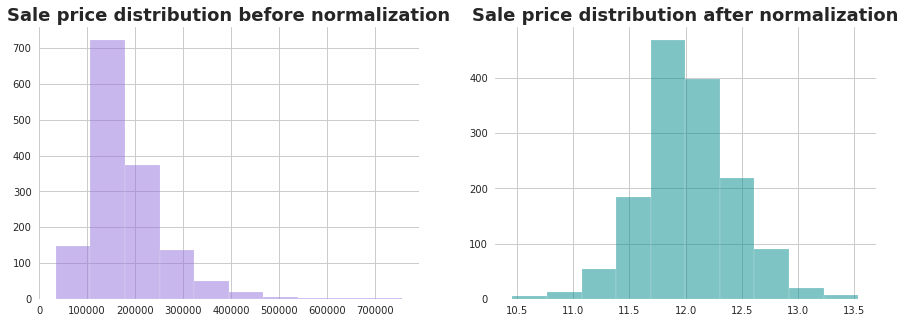

In [ ]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
plt.hist(a.SalePrice, bins=10, color='mediumpurple',alpha=0.5)
plt.title('Sale price distribution before normalization',weight='bold', fontsize=18)
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
plt.hist(target.SalePrice, bins=10, color='darkcyan',alpha=0.5)
plt.title('Sale price distribution after normalization',weight='bold', fontsize=18)
plt.show()

In [ ]:
print(f"Skewness after log transform: {target['SalePrice'].skew()}")
print(f"Kurtosis after log transform: {target['SalePrice'].kurt()}")

Skewness after log transform: 0.12299462625720967
Kurtosis after log transform: 0.8062416349541652


The skewness and kurtosis values look fine after log transform. We can now move forward to Machine Learning.

*P.S.To get our original SalePrice values back, we will apply **np.expm1** at the end of the study to cancel the log1p transformation after training and testing the models.*

# 6- Machine Learning:
***
> ### 6.1 Preprocessing

We start machine learning by setting the features and target:
* Features: x
* Target: y

In [ ]:
x=train
y=np.array(target)

Then, we split them to train and test sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)

We use RobustScaler to scale our data because it's powerful against outliers, we already detected some but there must be some other outliers out there, I will try to find them in future versions of the kernel

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
# transform "x_train"
x_train = scaler.fit_transform(x_train)
# transform "x_test"
x_test = scaler.transform(x_test)
#Transform the test set
X_test= scaler.transform(Test)

We first start by trying the very basic regression model: Linear regression. 
 
> ### 6.2 Linear regression


In [ ]:
#from sklearn.linear_model import LinearRegression

#lreg=LinearRegression()
#MSEs=ms.cross_val_score(lreg, x, y, scoring='neg_mean_squared_error', cv=5)
#meanMSE=np.mean(MSEs)
#print(meanMSE)
#print('RMSE = '+str(math.sqrt(-meanMSE)))

* Our goal is to minimize the error, we use regularization methods: Ridge, Lasso and ElasticNet, in order to lower the squared error.

> ### The metric RMSE:
The metric in this competition is RMSE. We will create a function ```score()``` (it takes one input parameter: Our predictions) to compute the RMSE score with all the models that will be used.

In [ ]:
def score(y_pred):
    return str(math.sqrt(sklm.mean_squared_error(y_test, y_pred)))

> ### 6.3 Regularization: 

>> ## Ridge regression:
* Minimize squared error + a term **alpha** that penalizes the error
* We need to find a value of **alpha** that minimizes the train and test error (avoid overfitting)

In [ ]:
import sklearn.model_selection as GridSearchCV
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters= {'alpha':[x for x in range(1,101)]}

ridge_reg=ms.GridSearchCV(ridge, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(x_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")
print(f"The best score achieved with Alpha=11 is: {math.sqrt(-ridge_reg.best_score_)}")
ridge_pred=math.sqrt(-ridge_reg.best_score_)

The best value of Alpha is: {'alpha': 22}
The best score achieved with Alpha=11 is: 0.11558851362391215


In [ ]:
ridge_mod=Ridge(alpha=15)
ridge_mod.fit(x_train,y_train)
y_pred_train=ridge_mod.predict(x_train)
y_pred_test=ridge_mod.predict(x_test)

print(f'Root Mean Square Error train =  {str(math.sqrt(sklm.mean_squared_error(y_train, y_pred_train)))}')
print(f'Root Mean Square Error test =  {score(y_pred_test)}')   

Root Mean Square Error train =  0.09316003819102558
Root Mean Square Error test =  0.11501394288460706


>> ### Cross validation:

We got a great RMSE score with our first model. Train/Test split sometimes doesn't give very accurate results especially if the data distribution is not the same in dataset. A way to solve this problem is **Cross Validation**. By setting the number of folds, in this case, we use `cv=5` where we split the dataset to 5 equal chunks and run the model 5 times, each time one fold is hold as a validation set.

Let's train the same model again but now with cross validation and see the variation between the folds:

In [ ]:
#Ridge regression
Ridge_CV=Ridge(alpha=15)
MSEs=ms.cross_val_score(Ridge_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Lasso
print(f'Mean RMSE with Ridge: {round(math.sqrt(np.mean(-MSEs)),4)}')

RMSE scores of the 5 folds:
Fold 0: 0.1103
Fold 1: 0.1196
Fold 2: 0.1218
Fold 3: 0.1048
Fold 4: 0.1123
Mean RMSE with Ridge: 0.1139


* Using **cross validation** helps to have a better score with ridge regression as we can see that there is variation between the 5 folds (0.104 and 0.1208).
***
* Next we try Lasso regularization: Similar procedure as ridge regularization but Lasso tends to have a lot of 0 entries in it and just few nonzeros (easy selection). In other words, lasso drops the uninformative features and keeps just the important ones.
* As with Ridge regularization, we need to find the **alpha** parameter that penalizes the error

>> ## Lasso regression

In [ ]:
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}


lasso=Lasso()
lasso_reg=ms.GridSearchCV(lasso, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(x_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')

The best value of Alpha is: {'alpha': 0.0009}


In [ ]:
lasso_mod=Lasso(alpha=0.0009)
lasso_mod.fit(x_train,y_train)
y_lasso_train=lasso_mod.predict(x_train)
y_lasso_test=lasso_mod.predict(x_test)

print(f'Root Mean Square Error train  {str(math.sqrt(sklm.mean_squared_error(y_train, y_lasso_train)))}')
print(f'Root Mean Square Error test  {score(y_lasso_test)}')

Root Mean Square Error train  0.09936835933176874
Root Mean Square Error test  0.11168012859740949


* We check next, the important features that our model used to make predictions
* The number of uninformative features that were dropped. Lasso give a 0 coefficient to the useless features, we will use the coefficient given to the important feature to plot the graph

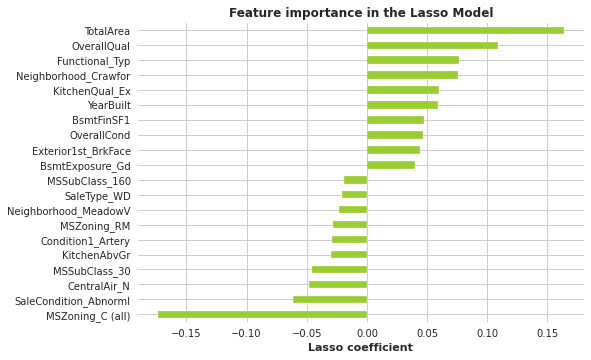

In [ ]:
coefs = pd.Series(lasso_mod.coef_, index = x.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh", color='yellowgreen')
plt.xlabel("Lasso coefficient", weight='bold')
plt.title("Feature importance in the Lasso Model", weight='bold')
plt.show()

Nice! The most important feature is the new feature we created "**TotalArea**". 
* Other features such as neighborhood or overall quality are among the main important features.

In [ ]:

print(f"Lasso kept {sum(coefs != 0)} important features and dropped the other  {sum(coefs == 0)} features")

Lasso kept 88 important features and dropped the other  224 features


As we did with Ridge regression, we will retrain lasso model with cross validation and see the variation between the 5 folds.

In [ ]:

#Lasso regression
Lasso_CV=Lasso(alpha=0.0009)
MSEs=ms.cross_val_score(Lasso_CV, x, y, scoring='neg_mean_squared_error', cv=5)

#RMSE score of the 5 folds
print("RMSE scores of the 5 folds:")
for i,j in enumerate(MSEs):
    j= math.sqrt(np.mean(-j))
    print(f'Fold {i}: {round(j,4)}')

#Final RMSE score with Lasso
print(f'Mean RMSE with Lasso: {round(math.sqrt(np.mean(-MSEs)),4)}')



RMSE scores of the 5 folds:
Fold 0: 0.1081
Fold 1: 0.1178
Fold 2: 0.1206
Fold 3: 0.1036
Fold 4: 0.111
Mean RMSE with Lasso: 0.1124


The same as with ridge cross validation, with Lasso als owe have variation between the 5 folds.
***
Next, we try ElasticNet. A regressor that combines both ridge and Lasso.
We use cross validation to find:
* Alpha
* Ratio between Ridge and Lasso, for a better combination of both

>> ## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV

#alphas = [10,1,0.1,0.01,0.001,0.002,0.003,0.004,0.005,0.00054255]
#l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

#elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

#elasticmod = elastic_cv.fit(x_train, y_train.ravel())
#ela_pred=elasticmod.predict(x_test)
#print('Root Mean Square Error test = ' + str(math.sqrt(sklm.mean_squared_error(y_test, ela_pred))))
#print(elastic_cv.alpha_)

I tried numberers that round alpha=0.0005 and found out that 0.0005425 gives the best score, so we continue with alpha=0.0005425

In [ ]:
from sklearn.linear_model import ElasticNetCV

alphas = [0.000542555]
l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

elasticmod = elastic_cv.fit(x_train, y_train.ravel())
ela_pred=elasticmod.predict(x_test)
print(f'Root Mean Square Error test = {score(ela_pred)}')
print(elastic_cv.alpha_)
print(elastic_cv.l1_ratio_)



Root Mean Square Error test = 0.11243685893429096
0.000542555
0.99


<h1>REGULARIZATION RECAP <span class="label label-danger">Function</span></h1>
***
In regularization we worked with 3 algorithms: Ridge (L2), Lasso (L1) and ElasticNet that is a combination of both L2 and L1 regressors.
Before moving to the next section of this work, I would like to introduce a function that does all the work we did above in details **just with one line of code.** The function does all the regression pipeline:



1.  Split the data to train/test
1.  Scale the data
1.  Gridsearch for the best hyperparameters
1.  Predict the target
1.  Evaluate the prediction


The function takes as input parameters:
- x: the features
- y: the target
- modelo: Ridge(default), Lasso, ElasticNetCV
- scaler: RobustScaler(default), MinMaxScaler, StandardScaler


<h4>In future versions, I will include more input parameters in this function to make it more flexible such as: The personalization of the hyperparameters search. <span class="label label-info">WORK IN PROGRESS</span></h4>




In [ ]:
def regularization(x,y,modelo=Ridge, scaler=RobustScaler):
    """"
    Function to automate regression with regularization techniques:
    
    -x: the features
    -y: the target
    -modelo: Ridge(default), Lasso, ElasticNetCV
    -scaler: RobustScaler(default), MinMaxSclaer, StandardScaler
    
    SOURCE: https://www.kaggle.com/amiiiney/price-prediction-regularization-stacking
    Contact: amineyamlahi@gmail.com
    """
    #Split the data to train/test
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = .3, random_state=0)
    
    #Scale the data. RobustSclaer default
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    
    scaler= scaler()
    # transform "x_train"
    x_train = scaler.fit_transform(x_train)
    # transform "x_test"
    x_test = scaler.transform(x_test)
    #Transform the test set
    X_test= scaler.transform(Test)
    
    if modelo != ElasticNetCV:
        if modelo == Ridge:
            parameters= {'alpha':[x for x in range(1,101)]}
        elif modelo == Lasso:
            parameters= {'alpha':[0.0001,0.0009,0.001,0.002,0.003,0.01,0.1,1,10,100]}
            
        model=modelo()
            
        model=ms.GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=15)
        model.fit(x_train,y_train)
        y_pred= model.predict(x_test)

        #print("The best value of Alpha is: ",model.best_params_)
        print("The best RMSE score achieved with %s is: %s " %(model.best_params_,
                  score(y_pred)))
    elif modelo == ElasticNetCV:
        alphas = [0.000542555]
        l1ratio = [0.1, 0.3,0.5, 0.9, 0.95, 0.99, 1]

        elastic_cv = ElasticNetCV(cv=5, max_iter=1e7, alphas=alphas,  l1_ratio=l1ratio)

        elasticmod = elastic_cv.fit(x_train, y_train.ravel())
        ela_pred=elasticmod.predict(x_test)
        print("The best RMSE score achieved with alpha %s and l1_ratio %s is: %s "
              %(elastic_cv.alpha_,elastic_cv.l1_ratio_, score(ela_pred)))
        
            

  

In [ ]:
regularization(x,y,Ridge)

The best RMSE score achieved with {'alpha': 22} is: 0.11490818092522415 


In [ ]:
regularization(x,y, Lasso)

The best RMSE score achieved with {'alpha': 0.0009} is: 0.11168012859740949 


In [ ]:
regularization(x,y, ElasticNetCV)

The best RMSE score achieved with alpha 0.000542555 and l1_ratio 0.99 is: 0.11243685893429096 


> ### 6.4 XGB and ExtraTrees regressors:

We will try other kind of regressors, such as XGBRegressor and ExtraTreesRegressor

In [ ]:
from xgboost.sklearn import XGBRegressor

#xg_reg = XGBRegressor()
#xgparam_grid= {'learning_rate' : [0.01],'n_estimators':[2000, 3460, 4000],
#                                     'max_depth':[3], 'min_child_weight':[3,5],
#                                     'colsample_bytree':[0.5,0.7],
#                                     'reg_alpha':[0.0001,0.001,0.01,0.1,10,100],
#                                    'reg_lambda':[1,0.01,0.8,0.001,0.0001]}

#xg_grid=GridSearchCV(xg_reg, param_grid=xgparam_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
#xg_grid.fit(x_train,y_train)
#print(xg_grid.best_estimator_)
#print(xg_grid.best_score_)

The gridSearch above tunes the hyperparamaters, but it takes forever to run. I copy the best estimator results to the model below. Feel free to uncomment and check it out.

In [ ]:
xgb= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=None, n_estimators=4000,
             n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
             reg_alpha=0.0001, reg_lambda=0.01, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgmod=xgb.fit(x_train,y_train)
xg_pred=xgmod.predict(x_test)
print(f'Root Mean Square Error test = {score(xg_pred)}')

Root Mean Square Error test = 0.1150181040313072


> ### 6.5 ENSEMBLE METHODS:
>> ## VOTING REGRESSOR:
* A voting regressor is an ensemble meta-estimator that fits base regressors each on the whole dataset. It, then, averages the individual predictions to form a final prediction.

* After running the regressors, we combine them first with voting regressor in order to get a better model

In [ ]:
from sklearn.ensemble import VotingRegressor

vote_mod = VotingRegressor([('Ridge', ridge_mod), ('Lasso', lasso_mod), ('Elastic', elastic_cv), 
                            ('XGBRegressor', xgb)])
vote= vote_mod.fit(x_train, y_train.ravel())
vote_pred=vote.predict(x_test)

print(f'Root Mean Square Error test = {score(vote_pred)}')

Root Mean Square Error test = 0.10917558145611779


>> ## STACKING REGRESSOR:

We stack all the previous models, including the votingregressor with XGBoost as the meta regressor:

In [ ]:
from mlxtend.regressor import StackingRegressor


stregr = StackingRegressor(regressors=[elastic_cv,ridge_mod, lasso_mod, vote_mod], 
                           meta_regressor=xgb, use_features_in_secondary=True
                          )

stack_mod=stregr.fit(x_train, y_train.ravel())
stacking_pred=stack_mod.predict(x_test)

print(f'Root Mean Square Error test = {score(stacking_pred)}')

Root Mean Square Error test = 0.10779419740971297


* Last thing to do is average our regressors and fit them on the testing dataset

>> ## Averaging Regressors

In [ ]:
#We coefficients were assigned manually
final_test=(0.3*vote_pred+0.5*stacking_pred+ 0.2*y_lasso_test)
print(f'Root Mean Square Error test=  {score(final_test)}')


Root Mean Square Error test=  0.10694666172249193


Averaging the 3 best models: Stacking, Voting and Lasso gave the best results: **The lowest RMSE**
* The coefficients assigned to the 3 models were tested manually, the models combination above gave the best RMSE score

> ### 6.6 Fit the model on test data

Now, we fit the models on the test data and then submit it to the competition

* We apply **np.expm1** to cancel the **np.logp1** *(we did previously in data processing)* and convert the numbers to their original form

In [ ]:
#VotingRegressor to predict the final Test
vote_test = vote_mod.predict(X_test)
final1=np.expm1(vote_test)

#StackingRegressor to predict the final Test
stack_test = stregr.predict(X_test)
final2=np.expm1(stack_test)

#LassoRegressor to predict the final Test
lasso_test = lasso_mod.predict(X_test)
final3=np.expm1(lasso_test)


Blending and submitting the **FINAL AVERAGE OF 3 REGRESSORS**

In [ ]:
#Submission of the results predicted by the average of Voting/Stacking/Lasso
final=(0.2*final1+0.6*final2+0.2*final3)

final_submission = pd.DataFrame({
        "Id": b["Id"],
        "SalePrice": final
    })
#final_submission.to_csv("final_submission.csv", index=False)
final_submission.head()

,Id,SalePrice
0,1461,119897.309741
1,1462,156390.522389
2,1463,183339.975841
3,1464,197742.902102
4,1465,188113.906492
